<a href="https://colab.research.google.com/github/ptrayers/et5003/blob/master/ET5003_Etivity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>


## ET5003_CS6134  Machine Learning Applications
## SEM1 2022/3

### ET5003_CS6134 Etivity 1 - Data Preprocessing and Training a Machine Learning Model

### Instructor: Emil Vassev
Sept 13th, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:green">Paul</span>
### Student Surname: <span style="color:green">Trayers</span>
### Student ID: <span style="color:green">8907921</span>
### Date of Final Submission: <span style="color:green">19th Nov 2023</span>
***

# 1: Introduction

## 1.1 Background
Real-world datasets for ML are expected to be *incomplete*, *inconsistent*, and *noisy* due to their heterogeneous origin. Applying ML algorithms on such data would not give quality results as they would fail to identify patterns effectively.

**Data Preprocessing** is a part of the ML process, which strives to improve the overall data quality by dealing with:
* duplicate or missing values - such data may give an incorrect view of the overall statistics of data;
* outliers and inconsistent data points - such data often tend to disturb the model’s overall learning and thus, leading to false predictions.

Data Preprocessing targets ML features, which are:
* individual independent variables operating as inputs to ML models;
* representations or attributes that describe the data and help the models to predict the classes/labels.

Example: features in a structured dataset (e.g., in a CSV format) refer to each column representing a measurable piece of data that can be used for analysis: name, age, sex, fare, etc.

**Model Training** is a primary step in ML in which a ML algorithm is fed with sufficient training data to learn from. Model Training results in a working ML model that can then be validated, tested and deployed.

## 1.2 Task Outline
In this e-tivity, you are asked to follow the ML process to:
* preprocess a provided dataset, so it will become suitable for ML operations;
* select an appropriate ML model, so it will cope with the specifics of data and ML tasks;
* train the selected ML model on the preprocessed dataset;
* test the selected ML model on the preprocessed dataset.
* The target variable is the Bond price, corresponding to field `Price`.

## 1.3 Load Dataset
The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed.

In [260]:
import pandas as pd

url_dataset = "https://raw.githubusercontent.com/evassev/ET5003_SEM1_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

In [261]:
# Set the Pandas display options to show all columns
pd.set_option('display.max_columns', None)
display(df.head(5))
display(df.tail(5))

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,Currency,OrdType,TransactTime,Price,PriceType,Yield,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,EUR,1,15:20:43,NaN,1,NaN,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,EUR,1,15:20:43,98.720,1,1.281,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,EUR,1,15:20:43,98.720,1,1.281,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,EUR,1,15:20:43,98.711,1,1.283,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,EUR,1,15:20:43,98.699,1,1.286,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT


,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,Currency,OrdType,TransactTime,Price,PriceType,Yield,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
19995,1,135087A38,WI,147039.0,1,GOC,8/1/2015,4/26/2013 0:00,SELL,12000000,6/24/2013,EUR,1,14:51:56,100.651,1,1.186,1,1,334,10792.0,7025,280,D,13,4,OUTRIGHT
19996,1,135087A38,WI,147038.0,1,GOC,8/1/2015,4/26/2013 0:00,BUY,50000000,6/24/2013,EUR,1,14:51:53,100.653,1,1.185,1,1,334,10792.0,6753,204,D,13,1,OUTRIGHT
19997,1,013051CZ8,WI,147033.0,1,PROV,12/1/2019,9/28/2009 0:00,SELL,700000,6/25/2013,EUR,1,14:50:59,109.000,1,2.478,1,1,332,10567.0,7053,292,D,13,4,OUTRIGHT
19998,1,135087A38,WI,147039.0,1,GOC,8/1/2015,4/26/2013 0:00,SELL,12000000,6/24/2013,EUR,1,14:51:56,100.645,1,1.189,1,1,330,9970.0,7025,280,D,13,4,OUTRIGHT
19999,1,013051CZ8,WI,147033.0,1,PROV,12/1/2019,9/28/2009 0:00,SELL,700000,6/25/2013,EUR,1,14:50:59,109.099,1,2.462,1,1,330,10189.0,7053,292,D,13,4,OUTRIGHT


## 1.4 Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model.  (10%)

The task is to predict the Bond Price represented by the `Price` data field and floating point type, continuous data type. As we want to predict prices based on previous examples we select a supervised training model and because we want to predict continuous numerical values it will be a regression. Therefore we will select a **Supervised-Regression** model;

### Supervised Learning
Supervised Learning is used when the data includes both input features and corresponding target labels. In this case, the dataset contains various features (like 'NoRelatedSym', 'Symbol', 'MaturityDate', etc.) along with the target variable 'Price'.
In supervised learning, the model learns to map inputs to outputs based on this labeled data, which is what's needed here - to learn the relationship between features and the bond price.

### Regression
Regression models are used for predicting continuous numerical values. Since the target variable `Price` is a continuous numerical value (floating point type), regression is the most suitable choice. A regression model will therefore provide a predicted numerical value for the bond price.


# Step 2: Data Preprocessing.  (70%)

## Step 2.1: Specifics of the dataset.  (10%)
<span>
    Show the specifics of the dataset in terms of:
    <ul>
    <li>shape</li>
    <li>columns (features)</li>
    <li>data types</li>
    <li>statistics for the 'Price' feature</li>
    <li>plot the 'Price' feature</li>
    </ul>    
</span>

### 2.1.1 Data shape

Using _shape_ to evaluate the number of rows and columns...



In [262]:
df.shape

(20000, 27)

20000 rows and 27 columns (features)

### 2.1.2 Dataset columns / data types

Getting a list of the feature columns and their data types..

In [263]:
# List all the column names and types
col_details = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values
})
print(col_details)
#df.info() # alternatively, use pandas df to display all columns and their data types

         Column Name Data Type
0       NoRelatedSym     int64
1             Symbol    object
2          SymbolSfx    object
3         SecurityID   float64
4   SecurityIDSource     int64
5       SecurityType    object
6       MaturityDate    object
7          IssueDate    object
8               Side    object
9           OrderQty     int64
10         SettlDate    object
11          Currency    object
12           OrdType     int64
13      TransactTime    object
14             Price   float64
15         PriceType     int64
16             Yield   float64
17         NoPartIDs     int64
18           PartyID     int64
19          DealerID     int64
20    DealerTraderID   float64
21  CustomerTraderID     int64
22        CustomerID     int64
23     PartyIDSource    object
24         PartyRole     int64
25       DealerCount     int64
26        OrdSubType    object


### 2.1.3 Statistics - `Price`

Get statistics for `Price` feature including count, mean, standard deviation, minimum, 10th percentile, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), 90th percentile, and maximum values for each numeric column.

In [264]:
# Add also the 10th and 90th percentiles to the quartiles.
df['Price'].describe(percentiles=[.1, .25, .5, .75, .9])

count    18692.000000
mean       107.535666
std         14.445474
min          0.000000
10%         97.115000
25%         99.749750
50%        103.324500
75%        110.360500
90%        129.186500
max        174.278000
Name: Price, dtype: float64

`Price` data statistics exhibits a right-skewed distribution with a mean of approximately 107.54 and a median of 103.32, suggesting the presence of higher-priced outliers. Prices vary moderately with a standard deviation of 14.45. The range extends from 0 to 174.28, indicating potential outliers or special cases, especially at the lower end. Most prices are clustered between 100 and 130.

### 2.1.3.1 Statistics - All features

Display the statistics of _all_ features..

In [265]:
df.describe()

,NoRelatedSym,SecurityID,SecurityIDSource,OrderQty,OrdType,Price,PriceType,Yield,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyRole,DealerCount
count,20000.0,6.041000e+03,20000.0,2.000000e+04,20000.0,18692.000000,20000.0,18703.000000,20000.0,20000.0,20000.000000,18945.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,1.0,1.085207e+06,1.0,4.622230e+06,1.0,107.535666,1.0,1.653129,1.0,1.0,331.217900,73717.118131,56223.862150,215.349650,13.0,3.750300
std,0.0,6.235101e+05,0.0,1.210594e+07,0.0,14.445474,0.0,0.867016,0.0,0.0,7.684697,52817.470148,54029.108707,296.486613,0.0,0.773809
min,1.0,1.466490e+05,1.0,1.000000e+03,1.0,0.000000,1.0,-0.032000,1.0,1.0,321.000000,5156.000000,5487.000000,2.000000,13.0,1.000000
25%,1.0,5.971960e+05,1.0,1.000000e+05,1.0,99.749750,1.0,0.996000,1.0,1.0,325.000000,10796.000000,6549.000000,57.000000,13.0,4.000000
50%,1.0,1.076888e+06,1.0,8.020000e+05,1.0,103.324500,1.0,1.707000,1.0,1.0,334.000000,114410.000000,12806.000000,129.000000,13.0,4.000000
75%,1.0,1.657785e+06,1.0,4.000000e+06,1.0,110.360500,1.0,2.241000,1.0,1.0,336.000000,117794.000000,116307.000000,248.000000,13.0,4.000000
max,1.0,2.314916e+06,1.0,2.500000e+08,1.0,174.278000,1.0,26.131000,1.0,1.0,448.000000,119844.000000,120031.000000,3436.000000,13.0,5.000000


### 2.1.4 Plot - `Price`

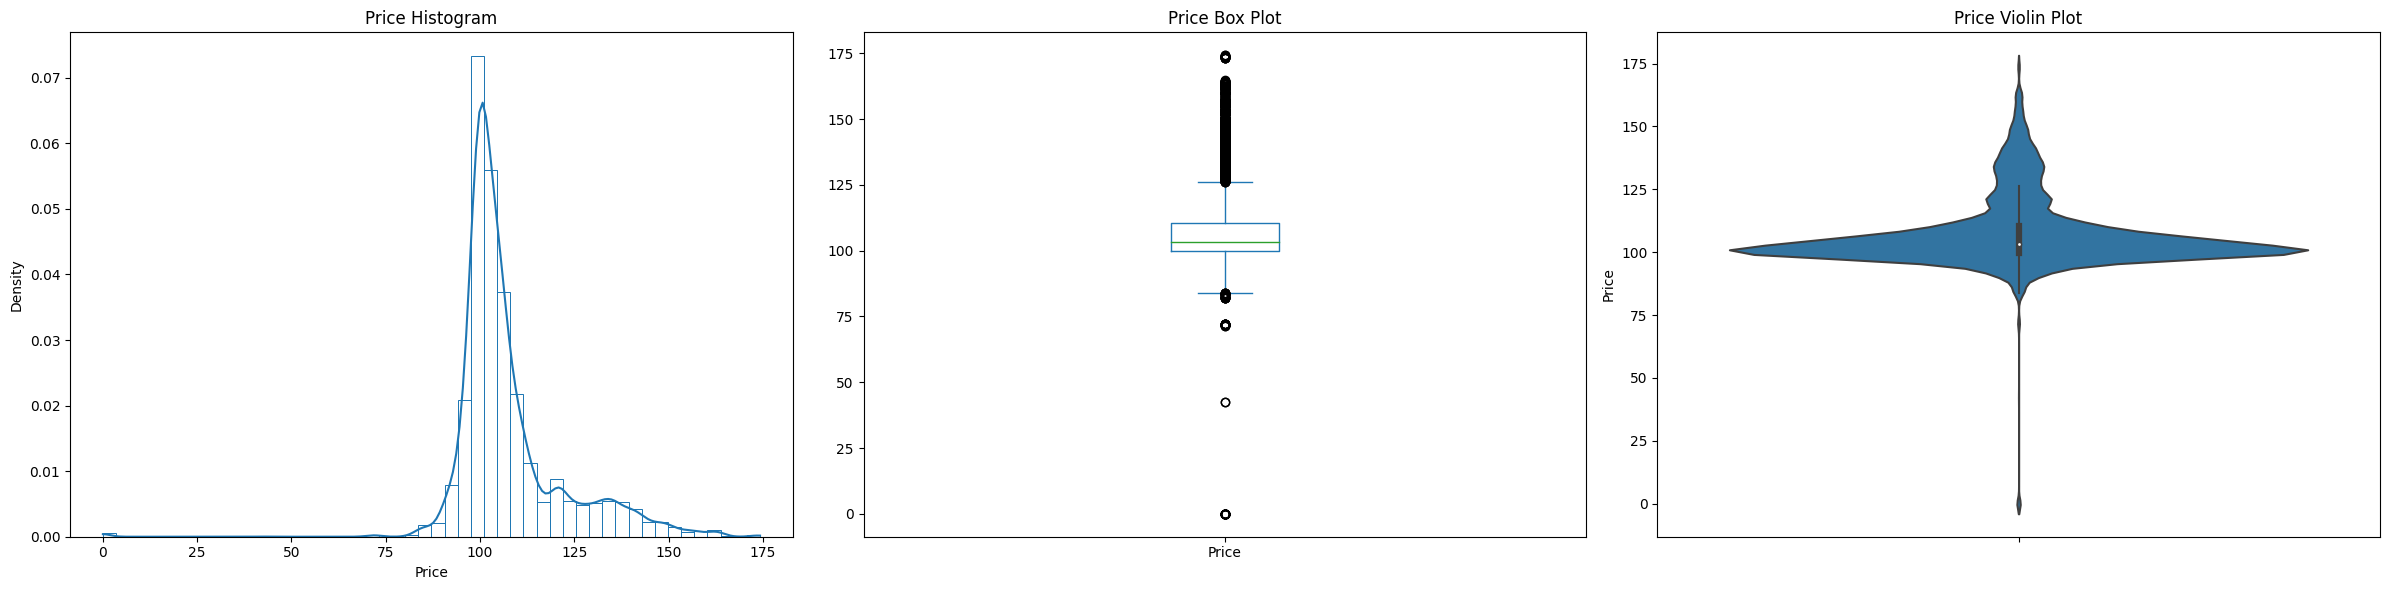

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Price' is the column you're plotting

# Set up the figure size
plt.figure(figsize=(24, 6))  # Adjusted the width to accommodate 4 plots

# Histogram
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
sns.histplot(data=df['Price'], kde=True, bins=50, stat="density", fill=False)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Density')

# Box Plot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
df['Price'].plot(kind='box')
plt.title('Price Box Plot')

# Violin Plot
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
sns.violinplot(data=df, y='Price')
plt.title('Price Violin Plot')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


**Price Histogram** indicates that the majority of the prices are clustered around a small range with a very sharp peak, suggesting a large concentration of similar values. There's a long right tail indicating that there are fewer instances of higher prices.

**Price Box Plot** shows that there's a relatively small interquartile range (the box itself), meaning the middle 50% of your prices are within a narrow range. There are several outliers on the higher end, which matches the long tail in the histogram.

**Price Violin Plot** reveals a bit more about the distribution than the box plot. It shows a high density of prices at the lower end, just like the histogram, but it also suggests that there's a secondary, less pronounced mode (a peak) at the higher end of the price range. This secondary mode isn't visible in the box plot and is less discernible in the histogram.

## Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset. (10%)

* Show the features with unique values for each row in the dataset.

In [267]:
# Find columns where the number of unique values equals the number of rows
unique_per_row_columns = df.columns[df.nunique() == df.shape[0]]

# Display these columns
print("Columns with unique values for each row in the dataset:")
print(unique_per_row_columns)

Columns with unique values for each row in the dataset:
Index([], dtype='object')


From above we see that there are no features with unique values for each row of the dataset.

* Remove the features with unique values for each row in the dataset...

In [268]:
# Iterate over each column and drop columns with unique values in every row
for column in df.columns:
    print("Working on column " + df[column].name)
    if df[column].nunique() == df.shape[0]:
        df.drop(column, axis=1, inplace=True)
        print("Column '" + column + "' has been removed from the dataset.")

# df.drop(columns=unique_per_row_columns, axis=1, inplace=True)  # Alternatively, drop features with unique values for all rows in database, in place

Working on column NoRelatedSym
Working on column Symbol
Working on column SymbolSfx
Working on column SecurityID
Working on column SecurityIDSource
Working on column SecurityType
Working on column MaturityDate
Working on column IssueDate
Working on column Side
Working on column OrderQty
Working on column SettlDate
Working on column Currency
Working on column OrdType
Working on column TransactTime
Working on column Price
Working on column PriceType
Working on column Yield
Working on column NoPartIDs
Working on column PartyID
Working on column DealerID
Working on column DealerTraderID
Working on column CustomerTraderID
Working on column CustomerID
Working on column PartyIDSource
Working on column PartyRole
Working on column DealerCount
Working on column OrdSubType


No features removed since none were identified with unique values for each row in the dataset.

## Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset. (10%)

Show the features with one unique value for the entire dataset...

In [269]:
# Find columns where the number of unique values is 1
single_unique_value_columns = df.columns[df.nunique() == 1]

# Display these columns
print("Columns with only one unique value for the entire dataset:")
print(single_unique_value_columns)

Columns with only one unique value for the entire dataset:
Index(['NoRelatedSym', 'SymbolSfx', 'SecurityIDSource', 'Currency', 'OrdType',
       'PriceType', 'NoPartIDs', 'PartyID', 'PartyIDSource', 'PartyRole',
       'OrdSubType'],
      dtype='object')


11 features were identified having only one unique value for the entire dataset, appearing to be mainly comprised of ID fields.

* Remove features with one one unique value for the dataset...

Examine each column in the DataFrame df and remove any columns where there is only one unique value - such columns typically do not add any predictive power to the model.

In [270]:
# Iterate over each column and drop columns with only one unique value
for column in df.columns:
    print("Working on column " + df[column].name)
    if df[column].nunique() == 1:
        df.drop(column, axis=1, inplace=True)
        print("Column '" + column + "' has been removed from the dataset.")

# Alternative, more efficent way of achieving same...
# df.drop(columns=single_unique_value_columns, axis=1, inplace=True)  # Remove these columns from the DataFrame

Working on column NoRelatedSym
Column 'NoRelatedSym' has been removed from the dataset.
Working on column Symbol
Working on column SymbolSfx
Column 'SymbolSfx' has been removed from the dataset.
Working on column SecurityID
Working on column SecurityIDSource
Column 'SecurityIDSource' has been removed from the dataset.
Working on column SecurityType
Working on column MaturityDate
Working on column IssueDate
Working on column Side
Working on column OrderQty
Working on column SettlDate
Working on column Currency
Column 'Currency' has been removed from the dataset.
Working on column OrdType
Column 'OrdType' has been removed from the dataset.
Working on column TransactTime
Working on column Price
Working on column PriceType
Column 'PriceType' has been removed from the dataset.
Working on column Yield
Working on column NoPartIDs
Column 'NoPartIDs' has been removed from the dataset.
Working on column PartyID
Column 'PartyID' has been removed from the dataset.
Working on column DealerID
Workin

11 features identified as having one unique value for the dataset and deleted form the dataframe above.

## Step 2.4: Data Cleaning: Remove records with null (NAN) values. (10%)

* Show the number of null values per feature.

Display the number of null values per column.

In [271]:
# Show the number of null values per feature
null_values_per_column = df.isnull().sum()
print("Number of null values per feature:\n\n", null_values_per_column)

# Print the number of records with
print(f"\nThe dataset contains {len(df)} records.")

Number of null values per feature:

 Symbol                  0
SecurityID          13959
SecurityType            0
MaturityDate            0
IssueDate               0
Side                    0
OrderQty                0
SettlDate               0
TransactTime            0
Price                1308
Yield                1297
DealerID                0
DealerTraderID       1055
CustomerTraderID        0
CustomerID              0
DealerCount             0
dtype: int64

The dataset contains 20000 records.


* For any feature, remove the rows containing a null value.

Drop rows with any null values using the dropna() method to remove rows that contain at least one null value.

In [272]:
# Remove rows with any null values
df.dropna(inplace=True)

# The modified DataFrame df now has no rows with null values
null_values_per_column = df.isnull().sum()
print("Number of null values per feature:\n\n", null_values_per_column)

# Print the number of records with
print(f"\nThe dataset contains {len(df)} records.")

Number of null values per feature:

 Symbol              0
SecurityID          0
SecurityType        0
MaturityDate        0
IssueDate           0
Side                0
OrderQty            0
SettlDate           0
TransactTime        0
Price               0
Yield               0
DealerID            0
DealerTraderID      0
CustomerTraderID    0
CustomerID          0
DealerCount         0
dtype: int64

The dataset contains 5685 records.


We can observe that 1663 rows (20000 - 18337) representing 0.083 of all rows have been dropped and that there are no null values remaining in the data.

### 2.3.1 **Extra Data Cleaning Step**: Drop features with no additional value

Analyse and remove columns with no contribution to the ML algorithm.

In [273]:
#df.drop('DealerTraderID', axis=1, inplace=True)
#df.drop('DealerID', axis=1, inplace=True)
#df.drop('CustomerTraderID', axis=1, inplace=True)
#df.drop('CustomerID', axis=1, inplace=True)
#df.drop('DealerCount', axis=1, inplace=True)

We take an additional step here (not specified in exercise requirements) to examine fields which may considered of limited value. The following fields are considered on the basis that they relate to operational aspects of buying/selling of the bond rather than having an influence over the price of the instrument.

Below table compares the R2 scores when inviddual features are removed.

| Dropped Feature | R^2 score |
|------------------------------|-----------|
| None (baseline)              | 0.9962    |
| DealerTraderID               | 0.9963    |
| DealerID                     | 0.9964    |
| CustomerTraderID             | 0.9967    |
| CustomerID                   | 0.9964    |
| DealerCount                  | 0.9963    |

It appears as if dropping `DealerTraderID`, `DealerID` and `CustomerTraderID` lead to (marginal) increase in R2 score while removal of `CustomerID` and `DealerCount` result in only a marginal decrease in R2. Although beyond the scope of this assignment, these fields could be considered for dropping on the basis on not adding value to the Bond Price model.

In [274]:
# Iterate over each column and drop columns with no contribution to the ML model.
columns_with_no_value = []  # just putting the mechanism here, but out of scope of the assignment)
for column in df.columns:
    print("Working on column " + df[column].name)
    if df[column].name in columns_with_no_value: # remove the current column
        df.drop(column, axis=1, inplace=True)
        print("Column '" + column + "' has been removed from the dataset.")

Working on column Symbol
Working on column SecurityID
Working on column SecurityType
Working on column MaturityDate
Working on column IssueDate
Working on column Side
Working on column OrderQty
Working on column SettlDate
Working on column TransactTime
Working on column Price
Working on column Yield
Working on column DealerID
Working on column DealerTraderID
Working on column CustomerTraderID
Working on column CustomerID
Working on column DealerCount


In [275]:
print(df.columns)
len(df.columns)

Index(['Symbol', 'SecurityID', 'SecurityType', 'MaturityDate', 'IssueDate',
       'Side', 'OrderQty', 'SettlDate', 'TransactTime', 'Price', 'Yield',
       'DealerID', 'DealerTraderID', 'CustomerTraderID', 'CustomerID',
       'DealerCount'],
      dtype='object')


16

## Step 2.5: Data Transformation: Convert all non-numeric features to numeric. (30%)

* Show all non-numeric features.


In [276]:
import numpy as np

no_number_features = df.select_dtypes(exclude=np.number).columns.tolist()
print(no_number_features)

['Symbol', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'SettlDate', 'TransactTime']


* Convert the non-numeric features to numeric.

Convert date fields to int

In [277]:
df['MaturityDate'] = pd.to_datetime(df['MaturityDate']).dt.strftime("%Y%m%d").astype(int)
df['IssueDate'] = pd.to_datetime(df['IssueDate']).dt.strftime("%Y%m%d").astype(int)
df['SettlDate'] = pd.to_datetime(df['SettlDate']).dt.strftime("%Y%m%d").astype(int)
# Taking the date portion only here, for another application where time of day may be considered important
# time could considered or separated out into another feature.
df['TransactTime'] = pd.to_datetime(df['TransactTime']).dt.strftime("%Y%m%d").astype(int)

Map categorical fields to numerical so they can be useful to the model.

In [278]:
class_mapper = {'BUY':1, 'SELL':2}
df['Side'] = df['Side'].replace(class_mapper)

In [279]:
security_type_values = df['SecurityType'].unique()
print(security_type_values)

['GOC' 'PROV' 'CMB']


In [280]:
class_mapper = {}
num = 0
for element in security_type_values:
    num += 1
    class_mapper[element] = num

df['SecurityType'] = df['SecurityType'].replace(class_mapper)

In [281]:
symbol_values = df['Symbol'].unique()
print(symbol_values)

class_mapper = {}
num = 0
for element in symbol_values:
    num += 1
    class_mapper[element] = num

df['Symbol'] = df['Symbol'].replace(class_mapper)

['135087D35' '135087H80' '135087H49' '135087G32' '135087H23' '68333ZAA5'
 '74814ZFD0' '135087ZS6' '135087C85' '74814ZEW9' '68323ACY8' '74814ZES8'
 '642869AF8' '748148QJ5' '68323AEA8' '135087D92' '135087WL4' '13509PEG4'
 '135087F58' '563469UA1' '13509PFL2' '13509PEF6' '135087G40' '68333ZAC1'
 '669827FV4' '44889ZEQ5' '013051DL8' '68323AAD6' '135087A61' '13509PCS0'
 '135087ZU1' '642869AJ0' '13509PER0' '13509PCL5' '135087D50' '68323ABR4'
 '13509PDV2' '68323ACX0' '13509PGM9' '68323ACU6' '135087H98' '13509PBN2'
 '110709FX5' '13509PGL1' '6832348J0' '74814ZEG4' '135087F25' '68323AEE0'
 '135087G81' '11070ZDK7' '1.35E+64' '13509PFR9' '135087F82' '31739ZAT2'
 '13509PGF4' '803854JL3' '013051DT1' '135087XW9' '13509PEP4' '135087B60'
 '135087ZJ6' '135087YQ1' '1107098Y1' '135087B45' '135087XG4' '135087ZL1'
 '135087YZ1' '135087B52' '135087VW1' '642866GA9' '642869AD3' '135087YR9'
 '13509PEA7' '135087A79' '68323ABN3' '683234NM6' '74814ZEF6' '68323ACG7'
 '74814ZEH2' '642866FZ5' '135087A95' '803854JA7' '68

In [282]:
df.head(10)

,Symbol,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,1,1657312.0,1,20481201,20140602,1,1000000,20180620,20231117,111.140,2.243,334,113683.0,11570,454,4
6205,1,1657312.0,1,20481201,20140602,1,1000000,20180620,20231117,111.220,2.240,335,114347.0,11570,454,4
6206,2,1657313.0,1,20200501,20180209,2,5000000,20180620,20231117,99.760,1.881,323,118599.0,6753,204,1
6207,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.198,2.241,321,7177.0,6687,178,4
6208,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.130,2.244,327,7687.0,6687,178,4
6209,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.190,2.241,334,113683.0,6687,178,4
6210,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.300,2.236,337,5168.0,6687,178,4
6211,1,1657324.0,1,20481201,20140602,1,1250000,20180620,20231117,111.180,2.241,321,7177.0,6687,178,4
6212,1,1657324.0,1,20481201,20140602,1,1250000,20180620,20231117,111.130,2.244,327,7687.0,6687,178,4
6213,1,1657324.0,1,20481201,20140602,1,1250000,20180620,20231117,111.150,2.243,334,113683.0,6687,178,4


# Step 3: Model Training and Testing.  (20%)

In [283]:
df.shape

(5685, 16)

In [284]:
df.head(10)

,Symbol,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,1,1657312.0,1,20481201,20140602,1,1000000,20180620,20231117,111.140,2.243,334,113683.0,11570,454,4
6205,1,1657312.0,1,20481201,20140602,1,1000000,20180620,20231117,111.220,2.240,335,114347.0,11570,454,4
6206,2,1657313.0,1,20200501,20180209,2,5000000,20180620,20231117,99.760,1.881,323,118599.0,6753,204,1
6207,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.198,2.241,321,7177.0,6687,178,4
6208,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.130,2.244,327,7687.0,6687,178,4
6209,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.190,2.241,334,113683.0,6687,178,4
6210,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,111.300,2.236,337,5168.0,6687,178,4
6211,1,1657324.0,1,20481201,20140602,1,1250000,20180620,20231117,111.180,2.241,321,7177.0,6687,178,4
6212,1,1657324.0,1,20481201,20140602,1,1250000,20180620,20231117,111.130,2.244,327,7687.0,6687,178,4
6213,1,1657324.0,1,20481201,20140602,1,1250000,20180620,20231117,111.150,2.243,334,113683.0,6687,178,4


## Step 3.1: Select and Import a ML Algorithm. (5%)
<span >
Based on your rationale provided in Step 1, we will import the following algorithm:
    <ul>
       <li>for Supervised Regression ML use <b>'from sklearn.ensemble import RandomForestRegressor'</b></li>
    </ul>
As a point of interest, other algorithms for supervised classification and unsupervised learning are;
    <ul>
       <li>for Unsupervised ML use <b>'from sklearn.cluster import KMeans'</b></li>
       <li>for Supervised Classification ML use <b>'from sklearn.ensemble import RandomForestClassifier'</b></li>
    </ul>
</span>

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Step 3.2: Train the ML Model. (10%)
<span>
    <ul>
    <li>from the preprocessed dataset, extract 𝑋 - a dataset of all the features but 'Price'</li>
    <li>from the preprocessed dataset, extract 𝑌  - vector that contains all the values of 'Price'</li>
    <li>slice the dataset: 80% for training and 20% for testing</li>
    <li>create an instance of the selected ML algorithm and train</li>
    </ul>    
</span>

In [286]:
from sklearn import metrics

Y = df.iloc[:,9]

# X as the first 9 columns concatenated with columns from the 11th onwards
X = pd.concat([df.iloc[:, :9], df.iloc[:, 10:]], axis=1)

display(Y)
display(X)

6204     111.140
6205     111.220
6206      99.760
6207     111.198
6208     111.130
          ...   
19995    100.651
19996    100.653
19997    109.000
19998    100.645
19999    109.099
Name: Price, Length: 5685, dtype: float64

,Symbol,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,1,1657312.0,1,20481201,20140602,1,1000000,20180620,20231117,2.243,334,113683.0,11570,454,4
6205,1,1657312.0,1,20481201,20140602,1,1000000,20180620,20231117,2.240,335,114347.0,11570,454,4
6206,2,1657313.0,1,20200501,20180209,2,5000000,20180620,20231117,1.881,323,118599.0,6753,204,1
6207,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,2.241,321,7177.0,6687,178,4
6208,1,1657317.0,1,20481201,20140602,1,1250000,20180620,20231117,2.244,327,7687.0,6687,178,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,150,147039.0,1,20150801,20130426,2,12000000,20130624,20231117,1.186,334,10792.0,7025,280,4
19996,150,147038.0,1,20150801,20130426,1,50000000,20130624,20231117,1.185,334,10792.0,6753,204,1
19997,304,147033.0,2,20191201,20090928,2,700000,20130625,20231117,2.478,332,10567.0,7053,292,4
19998,150,147039.0,1,20150801,20130426,2,12000000,20130624,20231117,1.189,330,9970.0,7025,280,4


In [287]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [288]:
rf_regressor = RandomForestRegressor(bootstrap = True, ccp_alpha = 0.0, criterion = 'squared_error',
                                     max_depth = None, max_features = 1.0, max_leaf_nodes = None,
                                     max_samples = None, min_impurity_decrease = 0.0, min_samples_leaf = 1,
                                     min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                                     n_estimators = 100, n_jobs = None, oob_score = False,
                                     random_state = None, verbose = 0, warm_start = False)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [289]:
# Identify all non-numeric features in X
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric features in X:", non_numeric_columns)

# Convert non-numeric features in X to numeric
for column in non_numeric_columns:
    # Example: Convert using label encoding for categorical data
    X[column] = X[column].astype('category').cat.codes

# Now X has its non-numeric features converted to numeric

Non-numeric features in X: Index([], dtype='object')


## Step 3.3: Test the ML Model. (5%)

* Use the testing part of the dataset to predict the Bond Prices
* Compute and show the prediction score

In [290]:
Y_pred = rf_regressor.predict(X_test)

Compute the linear regression score. 1 is maximum.

In [291]:
from sklearn import metrics
print(metrics.r2_score(Y_test, Y_pred))

0.9959612150260349


R^2 score is close to the maximum 1.

## Regression Plot

This scatter plot, displays the relationship between the labelled `Price` values (Y_test) and the predicted values (Y_pred) from our model. Each point is a single observation, with actual value on the X-axis and the model prediction for it on the Y-axis. The line represents the best fit regression line through the data points, providing a visual representation of the correlation between the actual and predicted values.

<Axes: xlabel='Price'>

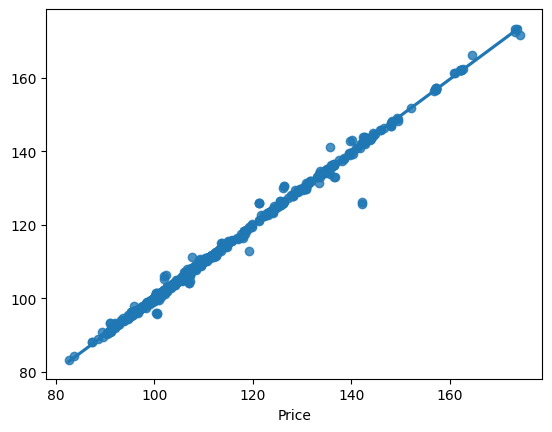

In [293]:
sns.regplot(x = Y_test, y = Y_pred)

The spread of points around the line indicates the variance in the model's accuracy, in this case points here indicating good performance being mostly very close to the line.

## Feature Importance Plot

Plotting the relative importance of features according to the RandomForestRegressor class..

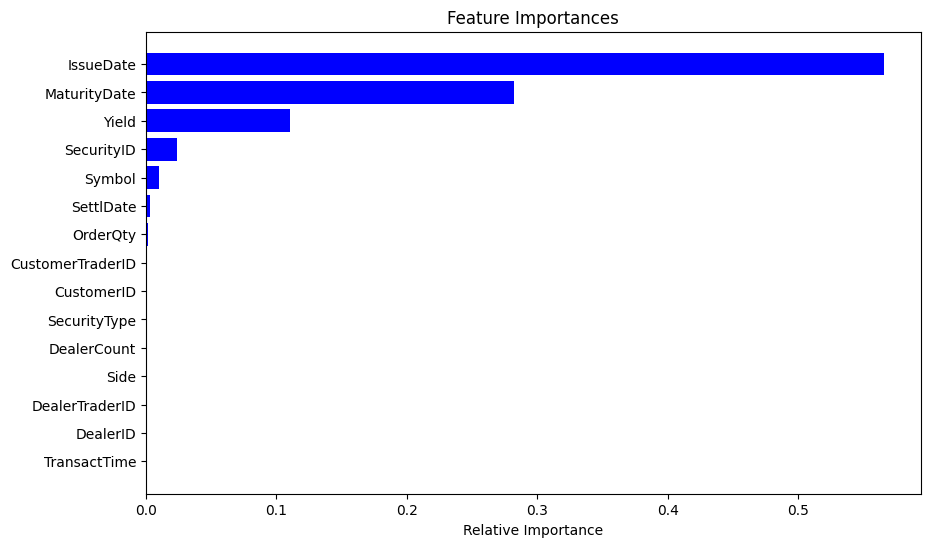

In [294]:
import matplotlib.pyplot as plt
import numpy as np

# rf_regressor is our trained Random Forest regressor model and X_train the training data with columns
feature_importances = rf_regressor.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

# Create the plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that `IssueDate` has the highest importance score by a significant margin, suggesting it is the most influential variable
in the model's predictions. `MaturityDate` and `Yield` also show relatively high importance.

Many of the remaining features here appear to contribute less or minimally to the model predictions lendng strength to the argument that features relating to the transactional aspect of buying/selling bond do not significantly influence the price and can be dropped.

However, we should also rememeber that feature importance scores do not indicate the the relationship between the feature and the target variable,
only the strength of the association.
